<a href="https://www.kaggle.com/code/tennillehardy/cohort-retention-analysis?scriptVersionId=165594918" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

This Python notebook provides a comprehensive analysis of monthly cohort retention, a vital aspect of understanding customer behavior and loyalty over time. Cohort analysis involves categorizing customers into groups based on certain characteristics, typically the time they first interacted with a product or service, and then tracking their behavior over subsequent periods.

In this notebook, we aim to achieve the following objectives:

1. Data Preprocessing: We start by preparing our dataset, which likely contains information such as customer IDs, transaction dates, and other relevant metrics.

2. Cohort Grouping: Customers are grouped into cohorts based on the month they first engaged with the product or service. This step involves identifying the initial month of each customer's interaction.

3. Cohort Index Calculation: We calculate the cohort index for each transaction, representing the number of periods (usually months) since the customer's first interaction. This index helps in analyzing customer behavior over time.

4. Retention Rate Calculation: The retention rate for each cohort is computed to assess how many customers from the original cohort are still active or retained in subsequent periods. Retention rates provide insights into customer loyalty and satisfaction.

5. Visualization: Finally, we visualize the retention rates using a heatmap, allowing for easy interpretation and comparison across different cohorts and time periods.

**Analysis Overview**

The analysis conducted in this notebook serves various purposes, including:

* Understanding Customer Behavior: By tracking retention rates over time, we gain insights into customer loyalty and engagement patterns. This understanding can inform marketing strategies, product improvements, and customer retention efforts.

* Identifying Trends and Opportunities: Patterns in cohort retention rates may reveal trends or opportunities for business growth. For example, consistently high retention rates in certain cohorts may indicate successful customer acquisition strategies.

* Evaluation of Marketing Campaigns: Cohort analysis can help assess the effectiveness of marketing campaigns by examining how different cohorts respond to promotional activities over time.

* Benchmarking Performance: Comparing retention rates across cohorts and against industry benchmarks enables businesses to gauge their performance and identify areas for improvement.

Overall, monthly cohort retention analysis is a powerful tool for businesses seeking to enhance customer satisfaction, drive growth, and optimize marketing efforts.

# Preperation
This section focuses on loading the necessary libraries and data, and transforming the data where necessary.

## Load Libraries

In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

## Load And Transform Data

In [2]:
data_path = '/kaggle/input/online-retail-ii-dataset/online_retail_II.xlsx'
#Load second sheet
df = pd.read_excel(data_path, sheet_name="Year 2010-2011")
#Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Cohort Retention Analysis
This section focuses on performing Cohort Retention Analysis

## Creating retention cohorts

In [3]:
##Invoice Period
#Function that converts date to year month
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
#Create the invoicemonth period column
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

##Cohort Group
#Split up customers in groups based on the month that they became a customer / they took first action **
#Group by organisation_id and select only the invoicemonth column
grouping = df.groupby('Customer ID')['InvoiceMonth']
#Take the earliest date of each customer and assign it back to the orignal dataset
df['CohortMonth'] = grouping.transform('min')


##Cohort Index
#Caluculate the time difference between each transaction for each respective customer -> shows the lifecylce of each customer
#Create a function that gets the integer value of the year and month
def get_date_int(df, column):
   year = df[column].dt.year
   month = df[column].dt.month
   return year, month
#Get the integers for the date parts from the 'InvoiceMonth' column
invoice_year, invoice_month = get_date_int(df, 'InvoiceMonth')
#Get the integers for date parts from the 'Cohortmonth' column
cohort_year, cohort_month = get_date_int(df, 'CohortMonth')
#Calculate difference in years
years_diff = invoice_year - cohort_year
#Calculate difference in months
months_diff = invoice_month - cohort_month
#Extract the difference in months from all previous values
df['CohortIndex'] = years_diff * 12 + months_diff + 1


##Retention Rate Per Cohort
#Caluclate retention rate for each customer cohort. This percentage indicates how much of the original customers are still a customer
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
#Count the number of unique values per organisation_id
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique).reset_index()
#Create a pivot
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Customer ID')
#Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]
#Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100
#View the data
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


## Visualising retention by monthly cohorts

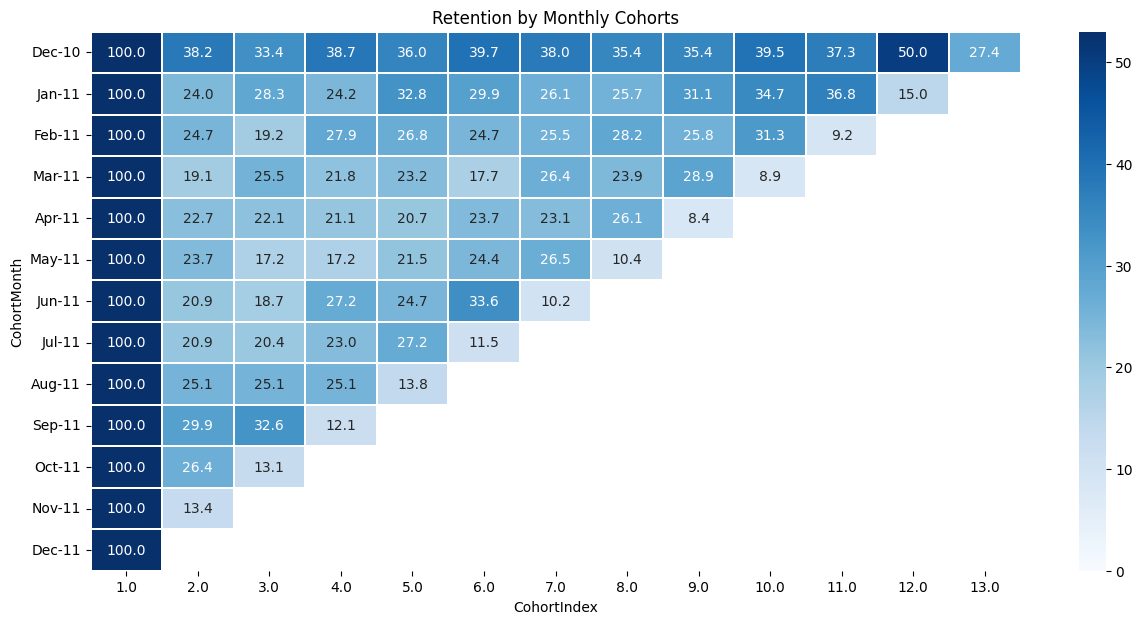

In [4]:
#Create list of month names for visualisation
month_list = retention.reset_index()['CohortMonth']

def get_month_name(x):
   return dt.datetime.strftime(x, '%b-%y')
  
month_list = month_list.apply(get_month_name)

#Initialize inches plot figure
plt.figure(figsize=(15,7))

#Add a title
plt.title('Retention by Monthly Cohorts')

#Create the heatmap
sns.heatmap(data=retention,
annot = True,
cmap = "Blues",
vmin = 0.0,
vmax = list(retention.max().sort_values(ascending = False))[1]+3,
fmt = '.1f',
linewidth = 0.3,
yticklabels=month_list)
plt.show();

## Visualise country by monthly cohorts

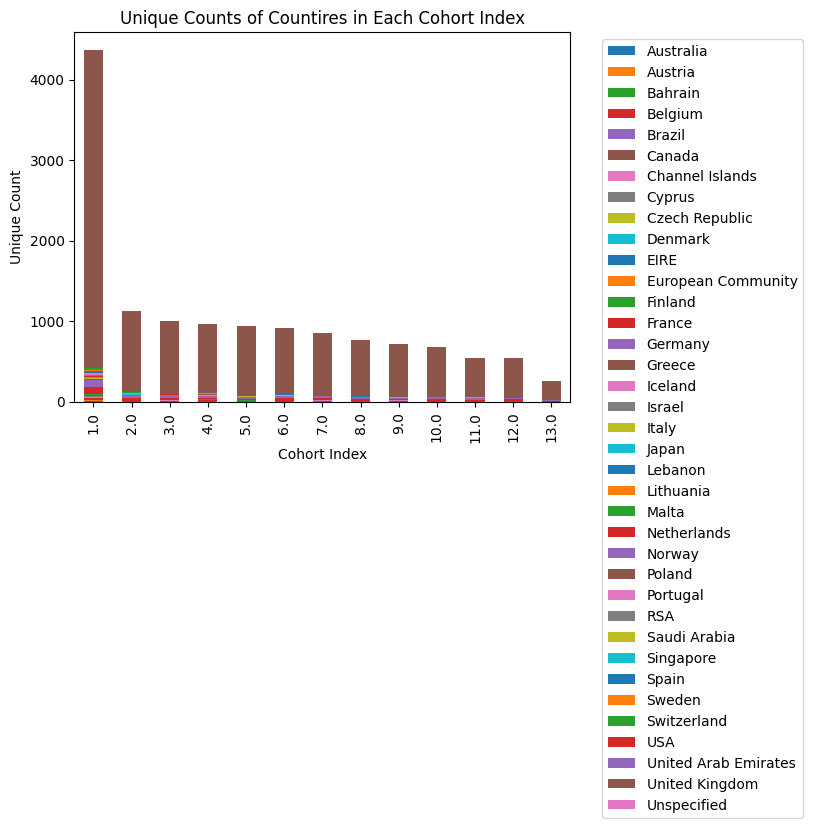

In [5]:
#Grouping by cohort_index and subscription_plan, counting unique organisation_id
unique_counts = df.groupby(['CohortIndex', 'Country'])['Customer ID'].nunique().reset_index(name='unique_count')

#Pivot the data to make it suitable for plotting
pivot_unique_counts = unique_counts.pivot(index='CohortIndex', columns='Country', values='unique_count').fillna(0)

#Plotting
ax = pivot_unique_counts.plot(kind='bar', stacked=True)
plt.xlabel('Cohort Index')
plt.ylabel('Unique Count')
plt.title('Unique Counts of Countires in Each Cohort Index')

#Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()